# Regression Analysis - Using TheDataMentor Analysis Template


Author: Brandon T. Jackson of DataJackson, LLC. 

Initalized: 3/10/2020

The following workbook blends my experience as a Data Scientist over the last 5 years as well as a year of mentoring working professionals through a paid data science bootcamp. 



# Analysis Agenda

[Link to Step 1: Setup Analysis Environment](#step1) 

[Link to Step 2: Frame The Problem](#step2)

[Link to Step 3: Collect Data](#step3)

[Link to Step 4: Clean Data](#step4)

[Link to Step 5: Explore Data](#step5)

[Link to Step 6: Model Data](#step6)

[Link to Step 7: Validate Model](#step7)

[Link to Step 8: Productionize Model](#step8)

<a id='step1'></a>

# Step 1: Setup Analysis Environment

In [200]:
import pandas as pd
import seaborn as sns
import sklearn as stk
import sklearn.datasets 
from sklearn.model_selection import KFold
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import scipy.stats as st
import statsmodels as sm

<a id='step2'></a>

# Step 2: Frame The Problem

Frame the problem: Who is your client? What exactly is the client asking you to solve? How can you translate their ambiguous request into a concrete, well-defined problem?

1. Make a clear statement of the problem
2. List the assumptions about the problem (e.g. about the data).
3. Describe the motivation for solving the problem.
    - Describe the benefits of the solution (model or the predictions).
    - Describe how the solution will be used.
4. Map domain knowledge to a machine learning solution 
    - Describe how the problem is currently solved (if at all).
    - Describe how a subject matter expert would make manual predictions.
    - Describe how a programmer might hand code a classifier.

<a id='step3'></a>

# Step 3: Collect or Access Your Data

Collect the raw data needed to solve the problem: 
- Is this data already available? If so, what parts of the data are useful? 
- If not, what more data do you need? What kind of resources (time, money, infrastructure) would it take to collect this data in a usable form?

### For ease of use:

I am going to randomly generate data using sklearn dataset. Resources listed below:


Resource - Synthetic Data - https://towardsdatascience.com/synthetic-data-generation-a-must-have-skill-for-new-data-scientists-915896c0c1ae

Resource - Generate Regression Data - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [183]:
# Function to create regression data

X, y =sklearn.datasets.make_regression(n_samples=1000, n_features=10, n_informative=10, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)

# Convert the array into a dataframe
X_df = pd.DataFrame(X)
pd.DataFrame(X_df).shape

y_df = pd.DataFrame(y)
y_df.shape

frames = [X_df,y_df]


# assign the regression data to df and then create column names
df = pd.concat(frames)
df.columns = ['Variable_'+str(df+1) for df in range(df.shape[1])]

In [184]:
df.describe()

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10
count,2000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.565584,0.064093,0.022638,-0.050735,-0.010937,0.051429,0.004162,-0.050216,-0.023346,-0.037591
std,168.728704,0.993171,0.957793,0.998522,0.983910,0.987296,1.003162,0.989142,1.016457,0.986065
min,-781.661804,-2.696208,-3.332310,-3.760441,-3.576242,-2.661001,-2.762259,-3.442309,-2.999678,-3.630713
25%,-1.933583,-0.558738,-0.656570,-0.722015,-0.666066,-0.615131,-0.664747,-0.704017,-0.687399,-0.716132
50%,0.076842,0.082552,0.019653,-0.060671,-0.004542,0.032564,-0.052180,-0.056960,0.017727,0.012821
75%,9.127273,0.738309,0.684926,0.623860,0.679549,0.702189,0.690963,0.645847,0.647994,0.670524
max,744.834924,3.042519,2.697678,2.889238,3.105151,3.907672,3.886259,2.765819,3.141150,2.659889


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 10 columns):
Variable_1     2000 non-null float64
Variable_2     1000 non-null float64
Variable_3     1000 non-null float64
Variable_4     1000 non-null float64
Variable_5     1000 non-null float64
Variable_6     1000 non-null float64
Variable_7     1000 non-null float64
Variable_8     1000 non-null float64
Variable_9     1000 non-null float64
Variable_10    1000 non-null float64
dtypes: float64(10)
memory usage: 171.9 KB


<a id='step4'></a>

# Step 4: Clean Data

Real, raw data is rarely usable out of the box. There are errors in data collection, corrupt records, missing values and many other challenges you will have to manage. You will first need to clean the data to convert it to a form that you can further analyze.


### Data Model:

 - Drop duplicate columns
 - Replace/drop missing values
 - Remove/ windsorize outliers
 - Remove unwanted string characters
    

### Science Model:

- Scaling: The preprocessed data may contain attributes with a mixtures of scales for various quantities such as dollars, kilograms and sales volume. Many machine learning methods like data attributes to have the same scale such as between 0 and 1 for the smallest and largest value for a given feature. Consider any feature scaling you may need to perform.
- Decomposition: There may be features that represent a complex concept that may be more useful to a machine learning method when split into the constituent parts. An example is a date that may have day and time components that in turn could be split out further. Perhaps only the hour of day is relevant to the problem being solved. consider what feature decompositions you can perform.
- Sampling: 


Resource: https://machinelearningmastery.com/how-to-prepare-data-for-machine-learning/

In [167]:
# Handling Missing Data

In [186]:
col_mask=df.isnull().any(axis=0)  # returns a boolean mask indicating np.nan values.

In [187]:
row_mask=df.isnull().any(axis=1) # return the rows where np.nan appeared

In [188]:
df.loc[row_mask,col_mask]  # by simple indexing you can flag all of your points that are np.nan.

,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
# Now for this analysis, we are simply going to set all NaN to 0, but you could replance with mean or median. 

df.fillna(df.mean(), inplace=True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 10 columns):
Variable_1     2000 non-null float64
Variable_2     2000 non-null float64
Variable_3     2000 non-null float64
Variable_4     2000 non-null float64
Variable_5     2000 non-null float64
Variable_6     2000 non-null float64
Variable_7     2000 non-null float64
Variable_8     2000 non-null float64
Variable_9     2000 non-null float64
Variable_10    2000 non-null float64
dtypes: float64(10)
memory usage: 171.9 KB


<a id='step5'></a>

# Step 5: Explore Data 

Perform in-depth analysis (machine learning, statistical models, algorithms): This step is usually the meat of your project,where you apply all the cutting-edge machinery of data analysis to unearth high-value insights and predictions.

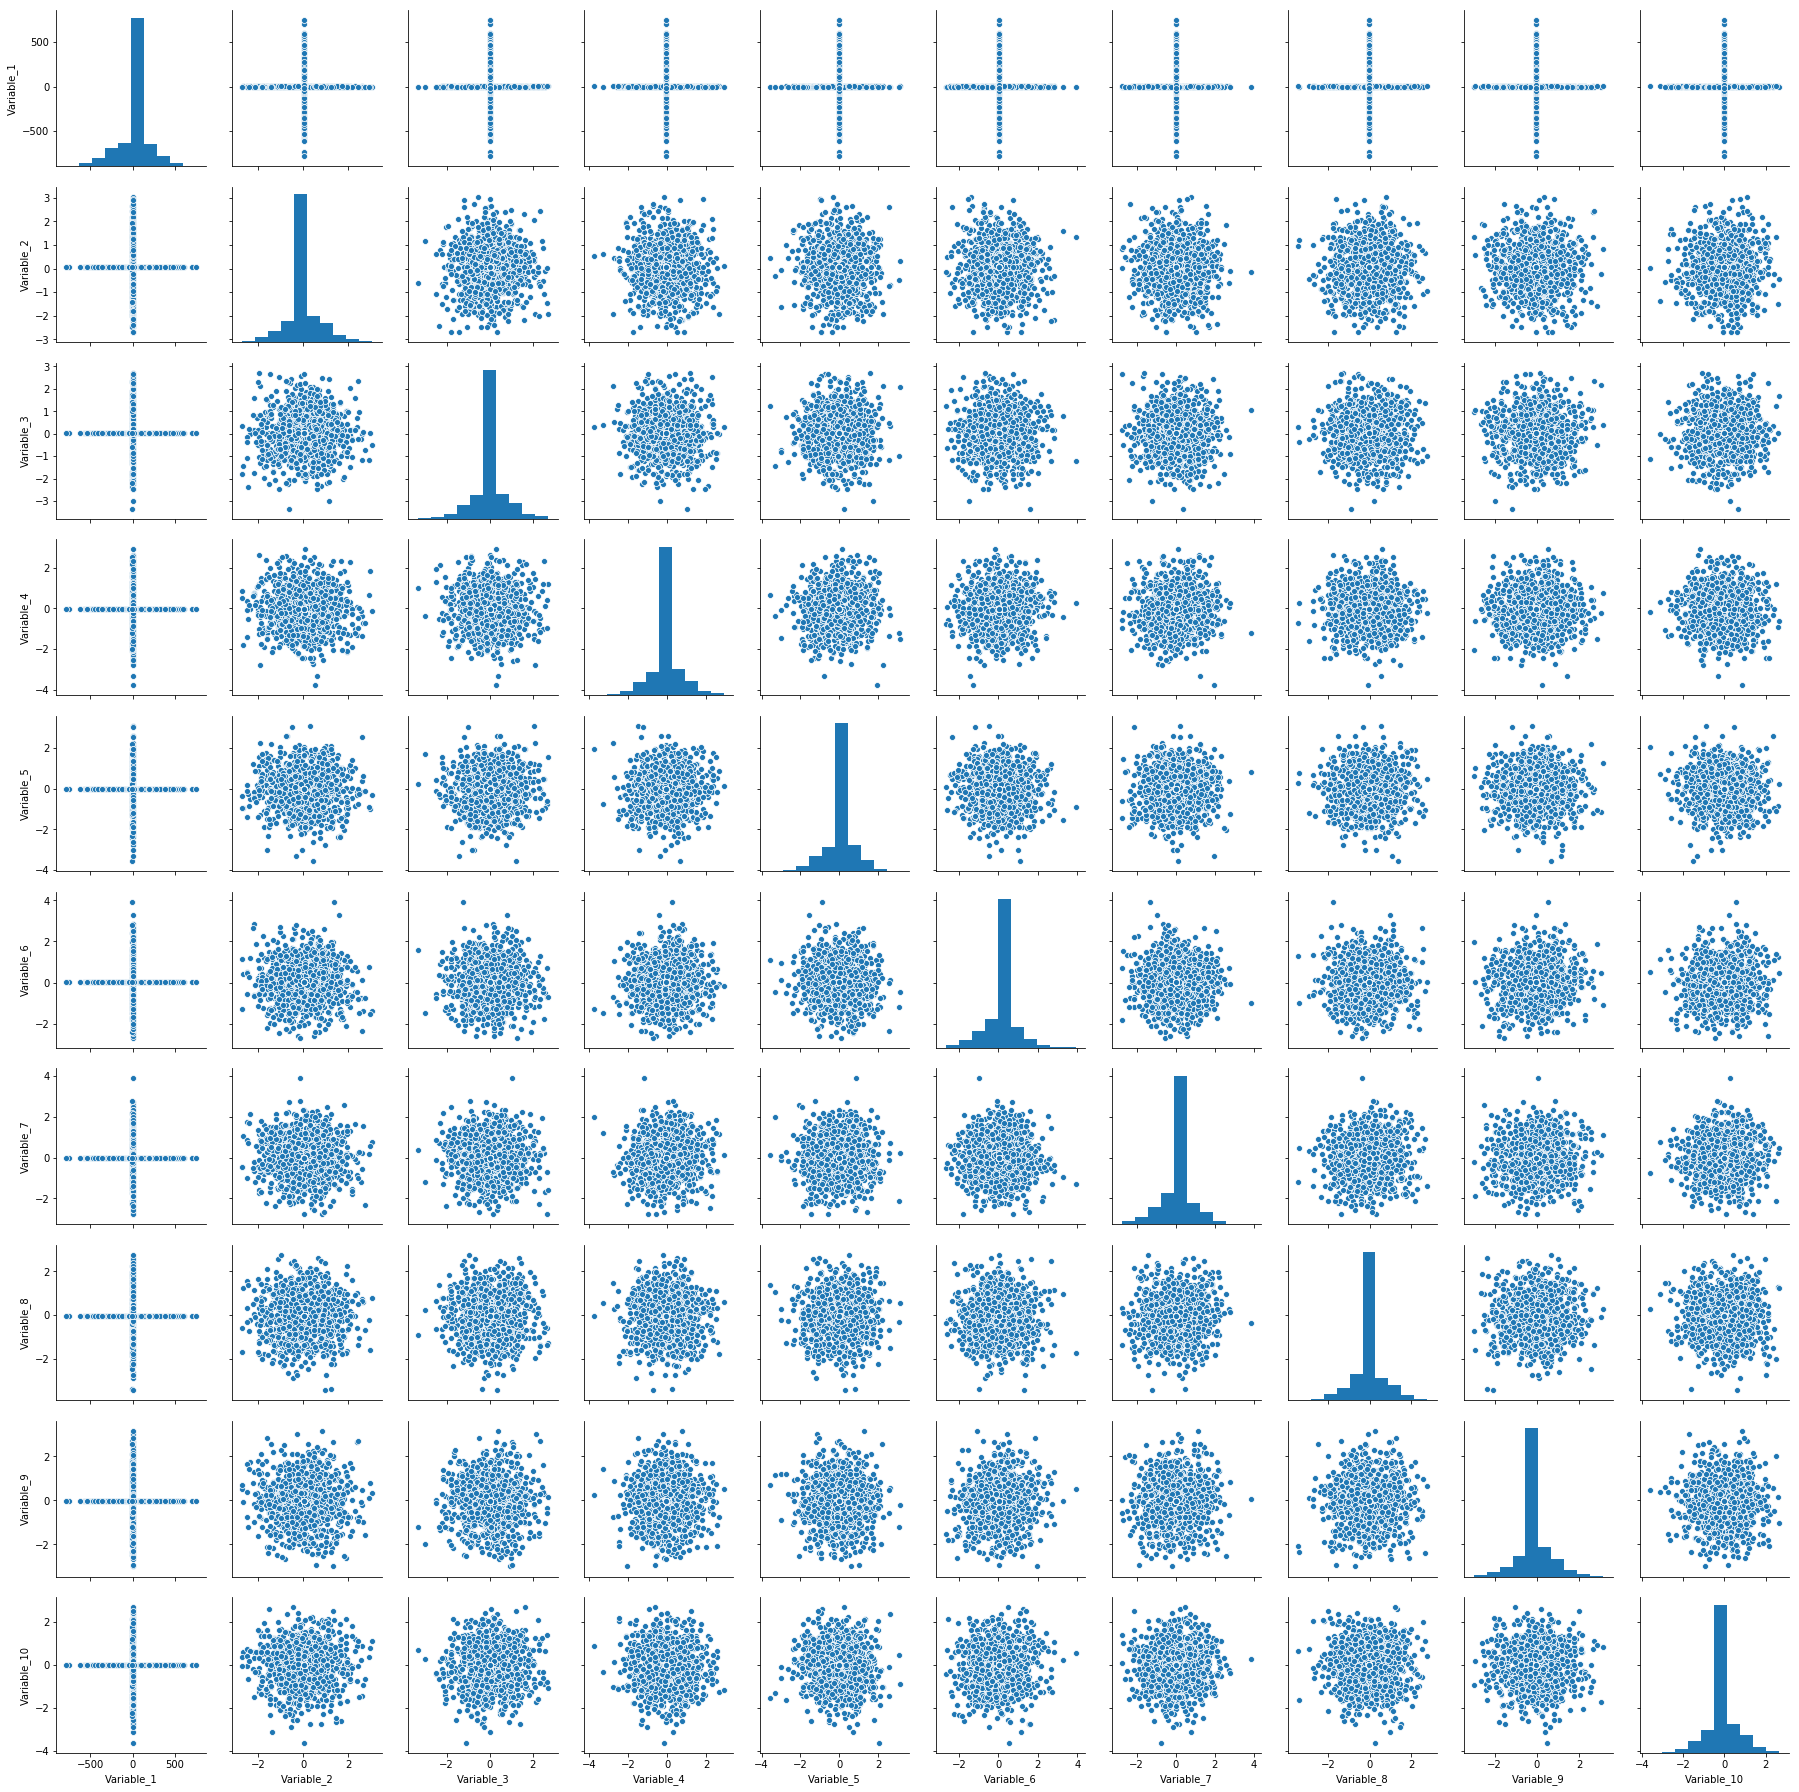

In [198]:
sns.pairplot(data=df);

### check the distribution of our Y variable

In [201]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

In [202]:

# Load data from statsmodels datasets
data = y_df


# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
best_dist = getattr(st, best_fit_name)


# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title(u' with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Wins Distribution')
ax.set_ylabel('Frequency')

NameError: name 'ax' is not defined

<a id='step6'></a>

# Step 6: Model Data

Document Model Assumptions:
    
    
    
    
    
Resource: https://towardsdatascience.com/all-the-annoying-assumptions-31b55df246c3

## split dataset into train and test data

In [193]:

#split dataset into train and test data
train , test = train_test_split(df, test_size = 0.4)

x_train = train
y_train = train

x_test = test
y_test = test


## Validate Model Assumptions

We create a function to validate the below assumptions for OLS regression. 

 - Assumption 1: Linear Relationship between the Target and the Features
 - Assumption 2: The error terms are normally distributed
 - Assumption 3: Little to no multicollinearity among predictors
 - Assumption 4: No Autocorrelation
 - Assumption 5: Homoscedasticity of Error Terms
 
###  Be sure to read the comments in the function because they will explain each of the assumptions in detail. 


In [123]:
def linear_regression_assumptions(features, label, feature_names=None):
    """
    Tests a linear regression on the model to see if assumptions are being met
    """
    from sklearn.linear_model import LinearRegression
    
    # Setting feature names to x1, x2, x3, etc. if they are not defined
    if feature_names is None:
        feature_names = ['X'+str(feature+1) for feature in range(features.shape[1])]
    
    print('Fitting linear regression')
    # Multi-threading if the dataset is a size where doing so is beneficial
    if features.shape[0] < 100000:
        model = LinearRegression(n_jobs=-1)
    else:
        model = LinearRegression()
        
    model.fit(features, label)
    
    # Returning linear regression R^2 and coefficients before performing diagnostics
    r2 = model.score(features, label)
    print()
    print('R^2:', r2, '\n')
    print('Coefficients')
    print('-------------------------------------')
    print('Intercept:', model.intercept_)
    
    for feature in range(len(model.coef_)):
        print('{0}: {1}'.format(feature_names[feature], model.coef_[feature]))

    print('\nPerforming linear regression assumption testing')
    
    # Creating predictions and calculating residuals for assumption tests
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    
    def linear_assumption():
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
        # Plotting the diagonal line
        line_coords = np.arange(df_results.min().min(), df_results.max().max())
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term')
        
        
    def normal_errors_assumption(p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
               
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        print('\n=======================================================================================')
        print('Assumption 2: The error terms are normally distributed')
        print()
    
        print('Using the Anderson-Darling test for normal distribution')

        # Performing the test on the residuals
        p_value = normal_ad(df_results['Residuals'])[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
    
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(df_results['Residuals'])
        plt.show()
    
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
        else:
            print('Assumption not satisfied')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
        
        
    def multicollinearity_assumption():
       
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction

                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        print('\n=======================================================================================')
        print('Assumption 3: Little to no multicollinearity among predictors')


        features = pd.DataFrame(X)


        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(pd.DataFrame(features, features.columns).corr(), annot=True)
        #sns.heatmap(features)
        plt.title('Correlation of Variables')
        plt.show()

        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')

        # Gathering the VIF for each variable
        VIF = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
        for idx, vif in enumerate(VIF):
            print('{0}: {1}'.format(features.columns[idx], vif))

        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
        definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
        print()
        print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
        print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
        print()

        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
        
    def autocorrelation_assumption():
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson
        print('\n=======================================================================================')
        print('Assumption 4: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(df_results['Residuals'])
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')

            
    def homoscedasticity_assumption():
        """
        Homoscedasticity: Assumes that the errors exhibit constant variance
        """
        print('\n=======================================================================================')
        print('Assumption 5: Homoscedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroscedasticity is apparent, confidence intervals and predictions will be affected')
        
        
    linear_assumption()
    normal_errors_assumption()
    multicollinearity_assumption()
    autocorrelation_assumption()
    homoscedasticity_assumption()

Fitting linear regression

R^2: 1.0 

Coefficients
-------------------------------------
Intercept: -4.440892098500626e-15
X1: 0.0
X2: 50.416425210074976
X3: 46.96557218224305
X4: 87.51832796558759
X5: 23.154474791407523
X6: 45.310290513432264
X7: 61.10008161888955
X8: 55.50140849757124
X9: 72.85893161896125
X10: 6.993978107255
X11: 29.730085352248135

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


C:\Users\bjack\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


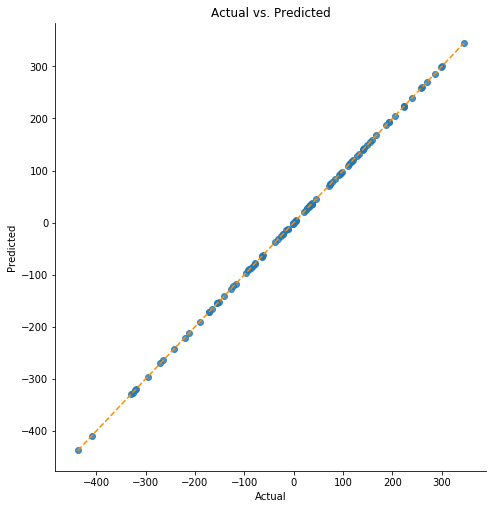

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution


C:\Users\bjack\Anaconda3\lib\site-packages\statsmodels\stats\_adnorm.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)


p-value from the test - below 0.05 generally means non-normal: 0.7416813226947592
Residuals are normally distributed


C:\Users\bjack\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


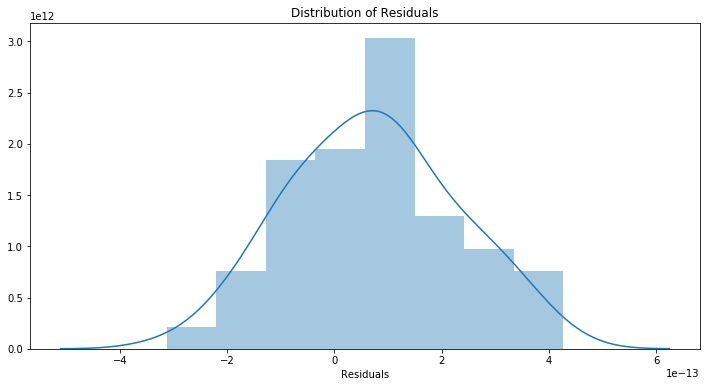


Assumption satisfied

Assumption 3: Little to no multicollinearity among predictors


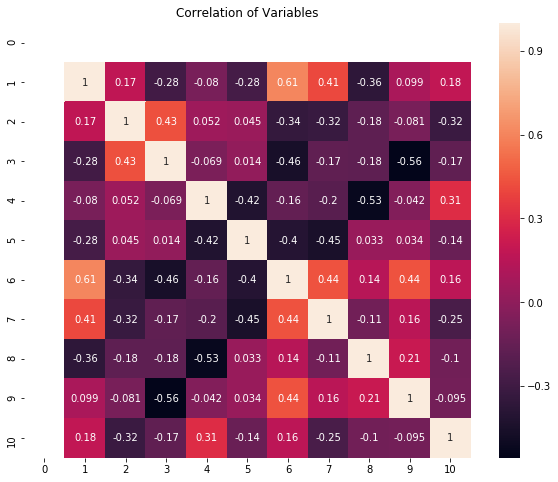

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
0: 1.072938350956202
1: 1.0882747595124034
2: 1.0650880342740754
3: 1.0759222738256173
4: 1.055917691467933
5: 1.0621281717634237
6: 1.0198111328048316
7: 1.0715986884389512
8: 1.061677358036067
9: 1.0710781292906366
10: 1.0923049690308546

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.7739571862433832
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


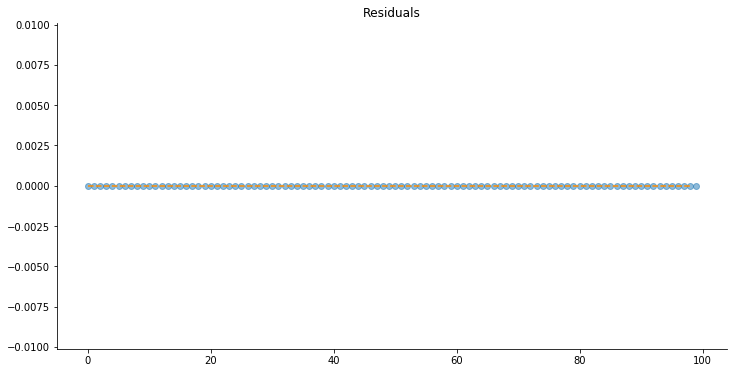

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [124]:
linear_regression_assumptions(X,y)

<a id='step7'></a>

## Now that we've validated the base regression model, bring in different types of regression algorithms and then compare their results

In [197]:
# Linear regression

lrm = LinearRegression()

lrm.fit(x_train, y_train)

# We are making predictions here
y_preds_train = lrm.predict(x_train)
y_preds_test = lrm.predict(x_test)

print("R-squared of the model in training set is: {}".format(lrm.score(x_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(x_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 1.0
Mean absolute error of the prediction is: 9.564217791193979e-15
Mean squared error of the prediction is: [2.06328848e-26 2.43799078e-31 3.14219731e-30 8.58798584e-31
 9.29901889e-31 1.83134028e-30 7.22330642e-30 3.13352927e-31
 1.18757822e-30 1.29800578e-30]
Root mean squared error of the prediction is: [1.43641515e-13 4.93760142e-16 1.77262441e-15 9.26713863e-16
 9.64314206e-16 1.35327022e-15 2.68762096e-15 5.59779355e-16
 1.08976062e-15 1.13930057e-15]
Mean absolute percentage error of the prediction is: Variable_1     4.499072e-12
Variable_2     1.968718e-13
Variable_3     4.269746e-12
Variable_4     1.850815e-12
Variable_5     3.144181e-12
Variable_6     1.615062e-12
Variable_7     3.437655e-11
Variable_8     2.953426e-13
Variable_9     2.211926e-12
Variable_10    1.602855e-12
dtype: float64


# Step 7: Craft Data Story 

Communicate results of the analysis: All the analysis and technical results that you come up with are of little value unless you can explain to your stakeholders what they mean, in a way that’s comprehensible and compelling. Data storytelling is a critical and underrated skill that you will build and use here.

<a id='step8'></a>

# Step 8: Productionize Machine Learning Model 